<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Lesson5/Another_copy_of_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [4]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df.drop(columns=['Loud Cover'], inplace=True)

# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


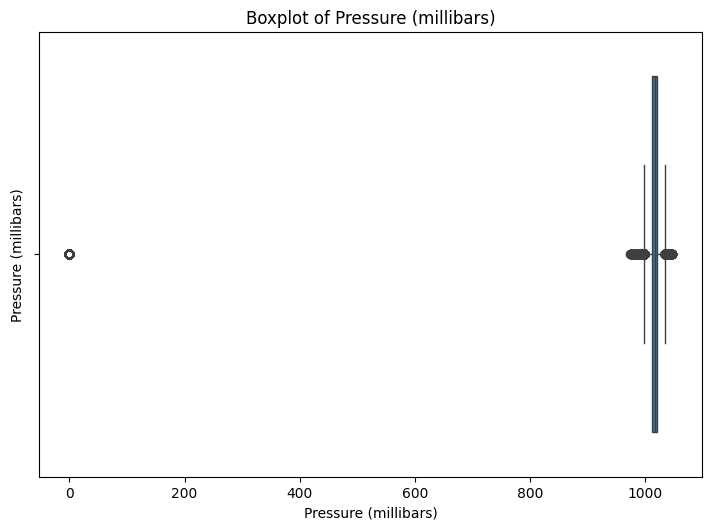

In [7]:
numeric_summary = df.describe()

min_max_diff = numeric_summary.loc['max'] - numeric_summary.loc['min']
boxplot_columns = min_max_diff[min_max_diff > (min_max_diff.mean() + min_max_diff.std())].index.tolist()

hist_columns = [col for col in numeric_summary.columns if col not in boxplot_columns]

plt.figure(figsize=(14, 10))
for i, column in enumerate(boxplot_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

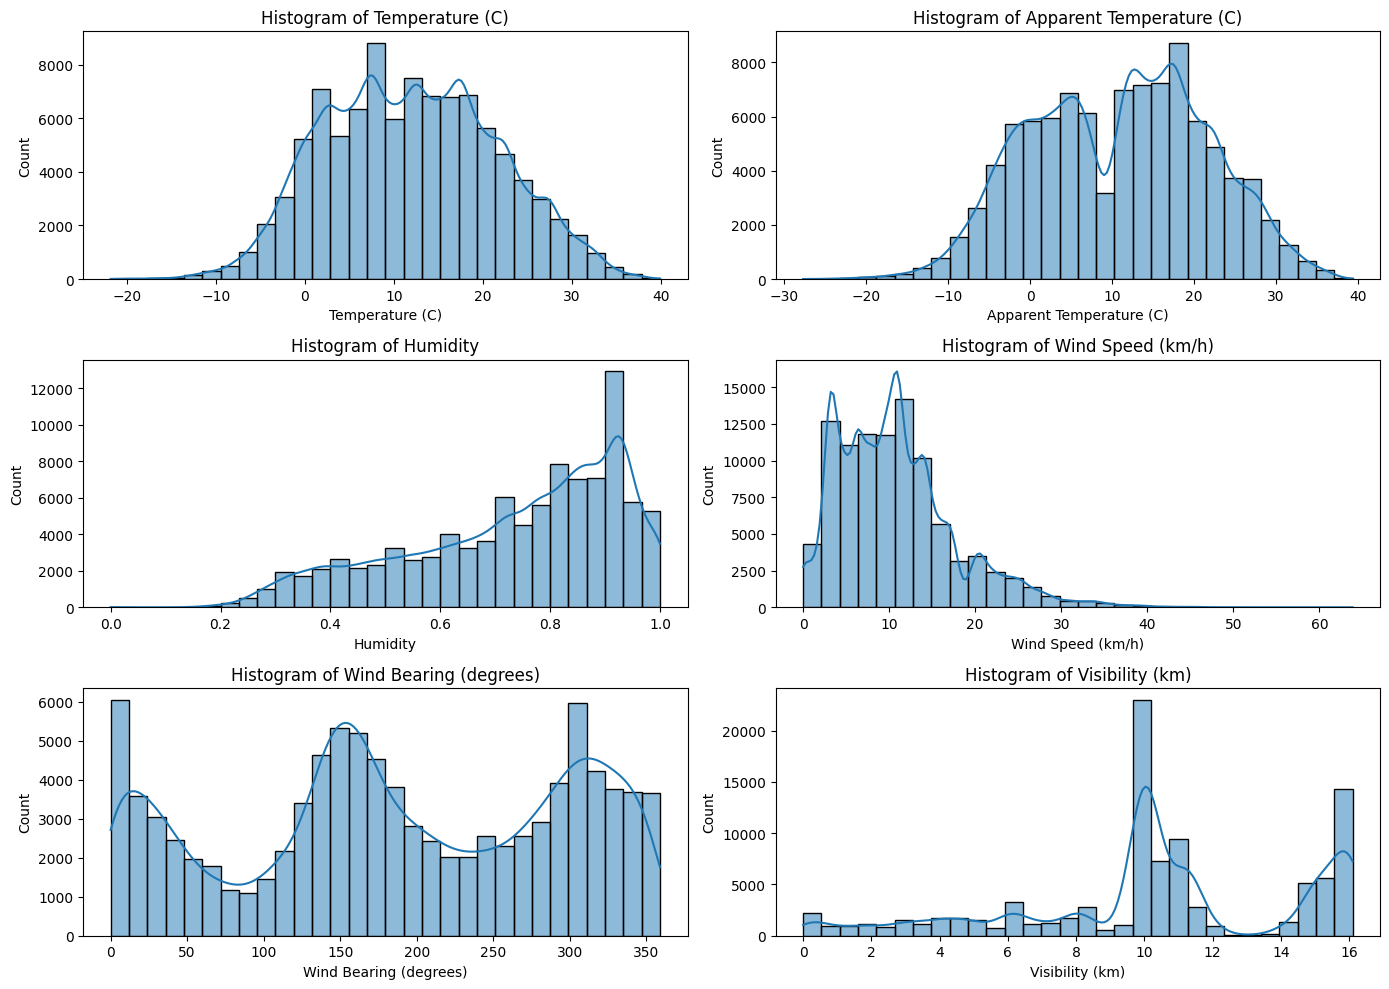

In [8]:
plt.figure(figsize=(14, 10))
n = len(hist_columns)
rows = math.ceil(n / 2)
for i, column in enumerate(hist_columns, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [9]:
columns = df.select_dtypes(include='number')

q1 = columns.quantile(0.25)
q3 = columns.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

mask = (columns >= lower) & (columns <= upper)

cleaned_df = df[mask.all(axis=1)]

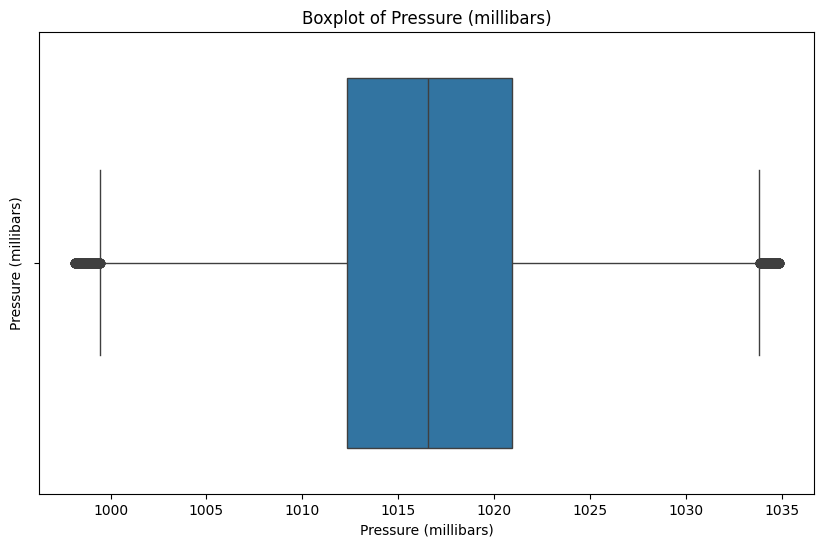

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pressure (millibars)', data=cleaned_df)
plt.title('Boxplot of Pressure (millibars)')
plt.ylabel('Pressure (millibars)')
plt.show()

# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

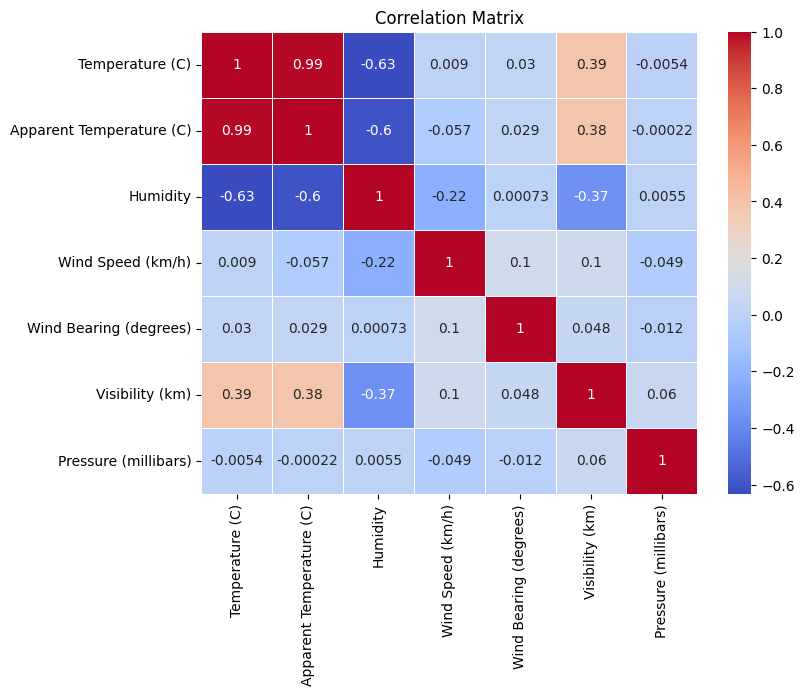

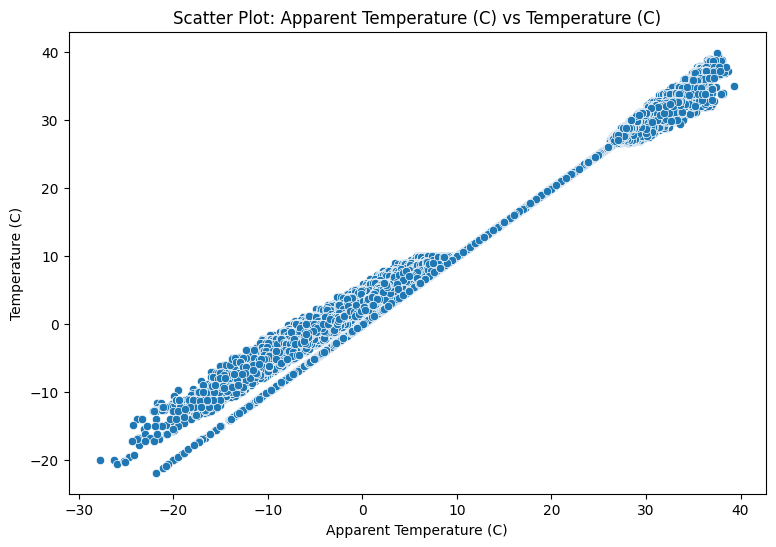

In [11]:
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

most_correlated = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
most_correlated = most_correlated[most_correlated < 1].drop_duplicates()
highest_correlation = most_correlated.idxmax()

plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x=highest_correlation[0], y=highest_correlation[1])
plt.title(f'Scatter Plot: {highest_correlation[0]} vs {highest_correlation[1]}')
plt.xlabel(highest_correlation[0])
plt.ylabel(highest_correlation[1])
plt.show()

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [12]:
df.describe(include="object")

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

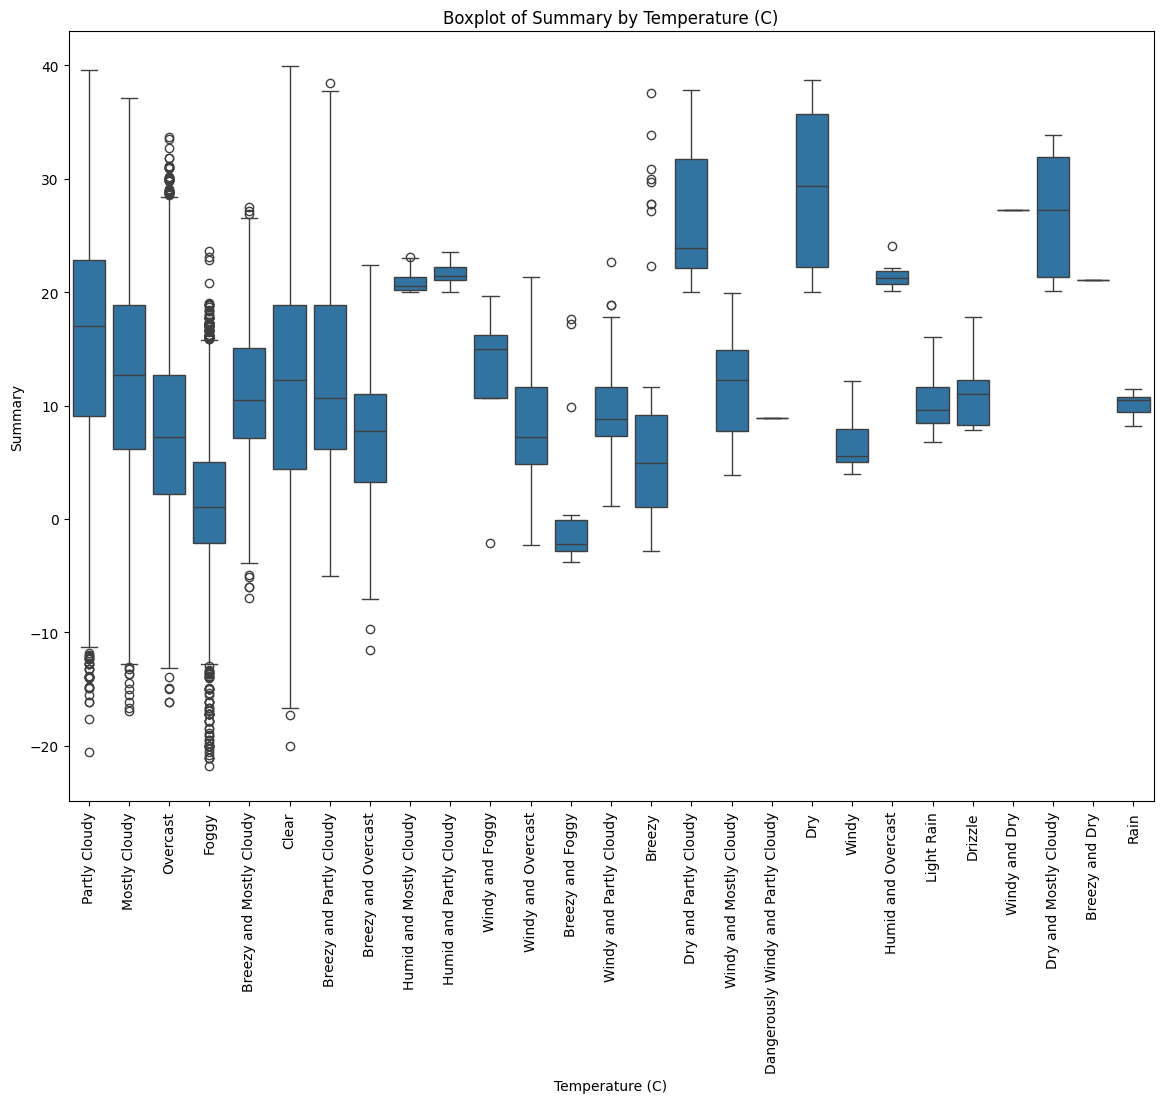

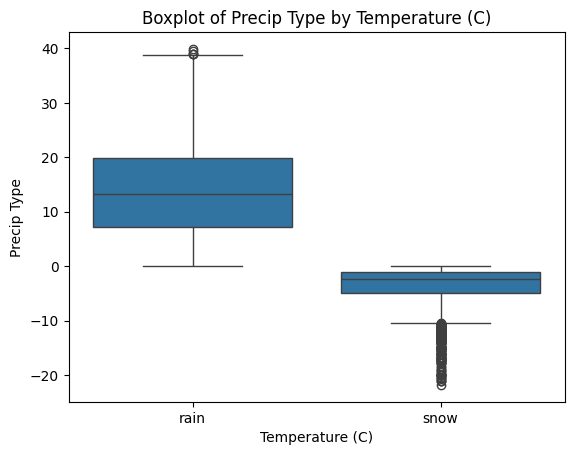

<Figure size 640x480 with 0 Axes>

In [27]:
categorical_column = cleaned_df.select_dtypes(include="object")

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_column, 1):
  if column == 'Formatted Date':
    continue
  if column == 'Daily Summary':
    continue
  #plt.subplot(2, 2, i)
  sns.boxplot(x=column, y='Temperature (C)', data=df)
  plt.title(f'Boxplot of {column} by Temperature (C)')
  plt.xlabel('Temperature (C)')
  plt.ylabel(column)
  if column == 'Summary':
    plt.xticks(rotation=90)
  plt.show()

plt.tight_layout()